# Entendiendo los Intervalos de Confianza (IC) en Python

## 1. ¿Qué es un Intervalo de Confianza?
En estadística, rara vez tenemos los datos de toda una población; trabajamos con **muestras**. 

El Intervalo de Confianza es un rango de valores, derivado de nuestra muestra, que probablemente contiene el valor real de la población. Se expresa con un **nivel de confianza** (usualmente 95%).

> **La Analogía del Pescador:** > * **Estimación puntual:** Es intentar atrapar un pez con una lanza (un solo número). Es difícil acertar exactamente.
> * **Intervalo de Confianza:** Es lanzar una red (un rango). Tenemos mucha más confianza de que el pez esté dentro de la red.

### ¿Cómo se interpreta el 95%?
No significa que hay un 95% de probabilidad de que el valor esté ahí. Significa que, si repitiéramos el experimento 100 veces, en 95 de esos experimentos el intervalo calculado contendría el valor real.


[Image of confidence interval sampling distribution]
markdown
## 2. La Fórmula Matemática
Para una media, el intervalo se calcula como:

$$IC = \bar{x} \pm (z \cdot \frac{s}{\sqrt{n}})$$

Donde:
* $\bar{x}$: Media de la muestra.
* $z$: Valor crítico (para 95% es 1.96).
* $s$: Desviación estándar.
* $n$: Tamaño de la muestra.
* $\frac{s}{\sqrt{n}}$: Es el **Error Estándar**.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Simulemos datos: Altura de 100 personas (en cm)
np.random.seed(42)
alturas = np.random.normal(loc=170, scale=10, size=100)

# 2. Cálculo manual del Intervalo de Confianza al 95%
media = np.mean(alturas)
n = len(alturas)
error_estandar = stats.sem(alturas) # Desviación estándar / sqrt(n)

# Usamos la distribución t de Student (ideal para muestras pequeñas o medianas)
intervalo = stats.t.interval(confidence=0.95, df=n-1, loc=media, scale=error_estandar)

print(f"Media muestral: {media:.2f}")
print(f"Intervalo de Confianza (95%): {intervalo[0]:.2f} a {intervalo[1]:.2f}")

Media muestral: 168.96
Intervalo de Confianza (95%): 167.16 a 170.76


## 3. ¿Por qué es útil en Correlaciones?
Cuando calculamos una correlación, también podemos obtener su intervalo de confianza. 
* Si el intervalo **cruza el cero** (ej. de -0.1 a 0.5), la correlación **no es significativa**, aunque el coeficiente sea alto.

In [2]:
# Ejemplo: Correlación entre Horas de Estudio y Calificación
horas = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
notas = np.array([2, 4, 4, 5, 7, 8, 8, 9, 9, 10])

# Usamos pingouin, una librería excelente para esto (si no la tienes: !pip install pingouin)
try:
    import pingouin as pg
    res = pg.corr(horas, notas)
    print("--- Análisis de Correlación con IC ---")
    print(res[['r', 'CI95%', 'p-val']])
except:
    print("Instala pingouin para ver los intervalos de correlación fácilmente: !pip install pingouin")

--- Análisis de Correlación con IC ---
                r         CI95%     p-val
pearson  0.974066  [0.89, 0.99]  0.000002


## 4. Visualización Didáctica
Un Intervalo de Confianza más **estrecho** significa que tenemos mucha precisión (pocos datos perdidos o muestra grande). Un intervalo **ancho** significa mucha incertidumbre.

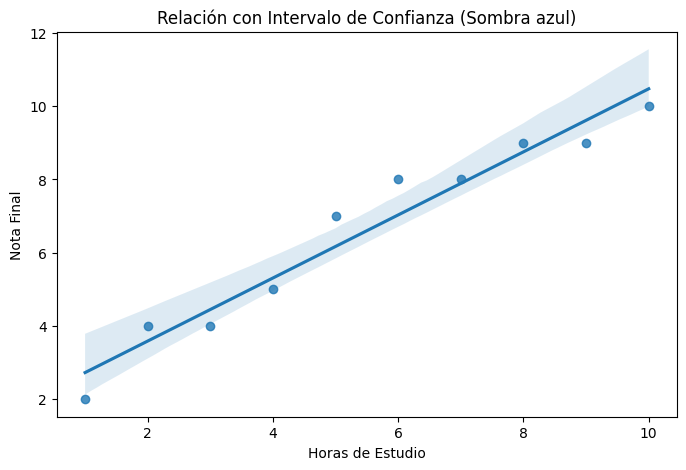

In [3]:
import seaborn as sns

# Visualización automática del IC en una regresión
plt.figure(figsize=(8, 5))
sns.regplot(x=horas, y=notas, ci=95) # 'ci' dibuja la sombra del intervalo
plt.title("Relación con Intervalo de Confianza (Sombra azul)")
plt.xlabel("Horas de Estudio")
plt.ylabel("Nota Final")
plt.show()

## **Resumen para tu aprendizaje:**

1. **P-valor:** Te dice si hay un efecto (¿Es real o azar?).

2. **Intervalo de Confianza:** Te dice qué tan grande es el efecto y qué tanta incertidumbre tenemos.

Regla de oro: Si tu intervalo de confianza para una diferencia de medias incluye el 0, o para un riesgo (OR/RR) incluye el 1, tu resultado no es estadísticamente significativo.